In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 시각화 작업에 필요한 라이브러리를 설치하고 import mgksek.
# !pip install matplotlib

import matplotlib.pyplot as plt # 그래프
import matplotlib as mpl
import matplotlib.font_manager as fm # 한글 때문에 import

# 한글 폰트를 사용할 때 마이너스 데이터가 깨져보이는 문제를 해결한다.
mpl.rcParams['axes.unicode_minus'] = False

# 그래프를 주피터 노트북 내부에 표시하기 위해 사용한다. (그래프가 안 보일 때 사용)
%matplotlib inline

In [3]:
# 그래프를 그리기 위한 데이터를 만든다.
data = np.random.randint(-100, 100, 50).cumsum() # 누적 합계
data

array([  64,   41,  104,  196,  271,  211,  214,  301,  344,  416,  502,
        529,  604,  650,  631,  642,  696,  786,  856,  911,  830,  928,
        860,  914,  909,  977, 1022,  923, 1022,  969,  911,  835,  876,
        865,  783,  789,  713,  737,  825,  922,  996,  911, 1005, 1092,
       1161, 1255, 1337, 1303, 1277, 1327], dtype=int32)

In [ ]:
# matplotlib의 기본 폰트로 sans-serif가 지정되어 있기 때문에 한글이 깨져서 보인다.
plt.plot(range(50), data, 'b') # x축 0부터 50까지
plt.rcParams['figure.figsize'] = (20, 7) # 차트 크기 사이즈 변경
plt.title('시간별 가격 추이') # 차트 제목
plt.ylabel('가격') # y축 제목
plt.xlabel('가격') # x축 제목
plt.show()

In [ ]:
# 폰트를 설정하기에 앞서 matplotlib의 설정 정보(버전, 위치)를 확인한다.
print('버전 :', mpl.__version__)
print('설치위치 :', mpl.__file__)
print('설정위치 :', mpl.get_configdir())
print('캐시위치 :', mpl.get_cachedir())

In [ ]:
# matplotlib의 설정 파일 위치를 확인한다.
print('설정 파일위치 :', mpl.matplotlib_fname())

In [ ]:
# 컴퓨터에 설치된 폰트 목록을 얻어온다.
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list)) # 컴퓨터에 저장된 글꼴의 개수 = 772
print(font_list[:10])

In [ ]:
font_list = [f.name for f in fm.fontManager.ttflist] 
# ttflist : 폰트 파일 리스트
# ttflist가 f로 전달되고 f 중에서 name(글꼴이름)만 불러온다

print(len(font_list))
print(font_list[:10]) 

In [ ]:
# 나눔 글꼴을 사용할 예정이므로 이름에 'Nanum'이 포함된 폰트만 가져온다.
# .name : 폰트 이름(글꼴이름), .fname : 글꼴이 다운된 경로 포함

# fm.fontManager.ttflist : 폰트 목록
# 폰트 목록에 있는 데이터가 하나씩 f로 이동
# (글꼴 이름, 글꼴이 설치된 경로)를 튜플로 출력
# 글꼴 중에서 'Nanum'(나눔)이 포함된 글꼴만 가져와라
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list

In [ ]:
# 위의 식을 실행한 결과가 []로 나오면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 실행해본다.
# 위에서 찾은 캐시 위치 : C:\Users\Huijung\AppData\Roaming\SPB_Data\.matplotlib

# 그래도 안되면 아래의 식을 실행한다.
# mpl.font_mannager._rebuild()

한글 폰트를 사용하는 방법은 3가지가 있다.

In [ ]:
# 1. FontProperties를 사용하는 방법 : 그래프의 폰트가 필요한 항목마다 지정한다.
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다.

# matplotlib.pyplot에서 지원하는 메서드
# => title(), xlabel(), ylabel(), legend()(범례), text() ...

# matplotlib.axes에서 지원하는 메서드
# => set_title()

In [ ]:
# 한글 폰트 파일의 경로와 이름을 지정한다.
font = 'C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=15)

In [ ]:
plt.plot(range(50), data, 'b') # x축 0부터 50까지
plt.rcParams['figure.figsize'] = (20, 7) # 차트 크기 사이즈 변경
plt.title('시간별 가격 추이', fontproperties=fontprop) # 차트 제목
plt.ylabel('가격', fontproperties=fontprop) # y축 제목
plt.xlabel('가격', fontproperties=fontprop) # x축 제목
plt.show()

# fontproperties=fontprop 추가로 한글 폰트가 깨지지 않는다.

In [ ]:
# 2. matplotlib 라이브러리의 rcParams[]로 전역 글꼴로 설정한다. 
# => 주피터 노트북에서 파일을 실행할 때 마다 해줘야 한다.
print('기본으로 설정된 폰트 크기:', plt.rcParams['font.size'])
print('기본으로 설정된 폰트 설정:', plt.rcParams['font.family'])

In [ ]:
# 2-1
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding'

In [ ]:
plt.plot(range(50), data, 'm')
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('시간별 가격 추이')
plt.ylabel('가격')
plt.xlabel('시간')
plt.show()

In [ ]:
# 2-2
# rcParams[] 대신 FontProperties의 plt.rc를 사용하는 방법

font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font, size=15).get_name()
print(font_name) # NanumGothicCoding
plt.rc('font', family=font_name)

In [ ]:
plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('시간별 가격 추이')
plt.ylabel('가격')
plt.xlabel('시간')
plt.show()

In [ ]:
# 3. rcParams를 matplotlib 설정 파일에 직접 넣어준다.
# => "현재" 컴퓨터의 모든 쥬피터 노트북에 적용된다.
# font.family : NanumGothicCoding
# 이곳에 폰트를 지정해 주면 현재 컴퓨터에서 주피터 노트북을 실행할 때마다 글꼴이 로드되도록 할 수 있다.
# 현재 설정 파일 위치 : c:\python_it\lib\site-packages\matplotlib\mpl-data\matplotlibrc

# 다른 pc에서는 사용하지 못한다.

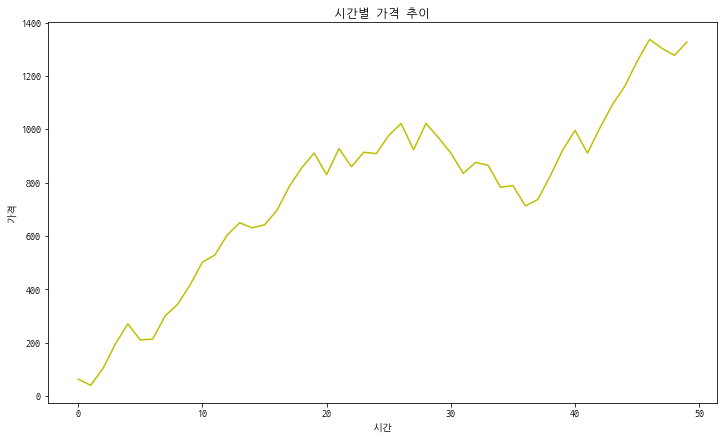

In [5]:
plt.plot(range(50), data, 'y')
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('시간별 가격 추이')
plt.ylabel('가격')
plt.xlabel('시간')
plt.show()